# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
* When looking at the plot for Latitude vs Max Temperature, we can see that locations closer to the equator have higher temperatures compared to the locations further away from the equator. This makes sense because the sun's rays hit the earth's surface at a higher angle at the equator due to the curved shape of earth. 
* The plot for Latitude vs. Wind Speed showed that wind speeds were much more uniform at the equator compared to the northern and southern hemisphere. This makes sense because the rotation of the earth on its axis causes winds to shift in direction. Winds in the northern hemisphere are shifted to the right and winds in the southern hempishere are shifted to the left.
* Southern Hemisphere has a much milder climate compared to the Northern Hemisphere. This makes sense because the Souther Hemisphere's surface area has more water compared to the Northern Hemisphere. Water has a high specific heat capacity so it cools down more slowly than land. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Set up lists to hold reponse info
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set up counter
record_no = 1
set_no = 1

#Starting print statements
print('Beginning Data Retrieval')
print('-----------------------------')

#Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        #Append data to lists 
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_record = response['name']
        
        print(f"Processing Record {record_no} of Set {set_no} | {city_record}")
        
        #Count up to 50 records then start a new set
        if record_no < 50:
            record_no += 1
        else:
            record_no = 1
            set_no += 1
    except:
        print("City not found. Skipping...")
        
#     Prevent exceeding API Rate Call
    time.sleep(1)
    
# Ending print statements
print('-------------------------------')
print('Data Retrieval Complete')
print('-------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Tiksi
Processing Record 2 of Set 1 | Marsá Maţrūḩ
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Bluff
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Sillod
Processing Record 7 of Set 1 | Busselton
Processing Record 8 of Set 1 | Myaundzha
Processing Record 9 of Set 1 | Westport
City not found. Skipping...
Processing Record 10 of Set 1 | Tasiilaq
Processing Record 11 of Set 1 | Bilibino
Processing Record 12 of Set 1 | Tuktoyaktuk
Processing Record 13 of Set 1 | Jamestown
Processing Record 14 of Set 1 | Cape Town
Processing Record 15 of Set 1 | Narsaq
Processing Record 16 of Set 1 | Port Elizabeth
Processing Record 17 of Set 1 | Udachny
Processing Record 18 of Set 1 | Am Timan
Processing Record 19 of Set 1 | Boa Vista
Processing Record 20 of Set 1 | Ostrovnoy
Processing Record 21 of Set 1 | Yellowknife
Processing Record 22 of Set 1 | Mataura
Processing

Processing Record 34 of Set 4 | Saint-Leu
Processing Record 35 of Set 4 | Waipawa
City not found. Skipping...
Processing Record 36 of Set 4 | Ponta do Sol
Processing Record 37 of Set 4 | Gaomi
Processing Record 38 of Set 4 | Biak
City not found. Skipping...
Processing Record 39 of Set 4 | Samsun Province
Processing Record 40 of Set 4 | Baykit
Processing Record 41 of Set 4 | Mount Gambier
Processing Record 42 of Set 4 | Kichmengskiy Gorodok
Processing Record 43 of Set 4 | Lata
Processing Record 44 of Set 4 | Bourail
City not found. Skipping...
Processing Record 45 of Set 4 | Chechat
Processing Record 46 of Set 4 | Pisco
Processing Record 47 of Set 4 | Faanui
Processing Record 48 of Set 4 | Strezhevoy
Processing Record 49 of Set 4 | Constitución
Processing Record 50 of Set 4 | Newport
Processing Record 1 of Set 5 | Koutsouras
Processing Record 2 of Set 5 | Chumikan
City not found. Skipping...
Processing Record 3 of Set 5 | Beyneu
Processing Record 4 of Set 5 | Mount Isa
Processing Record

Processing Record 22 of Set 8 | Albania
Processing Record 23 of Set 8 | Yenagoa
Processing Record 24 of Set 8 | Richards Bay
Processing Record 25 of Set 8 | Camacha
Processing Record 26 of Set 8 | Vylkove
Processing Record 27 of Set 8 | Neftçala
City not found. Skipping...
Processing Record 28 of Set 8 | Māngrol
Processing Record 29 of Set 8 | Moranbah
Processing Record 30 of Set 8 | Pemangkat
Processing Record 31 of Set 8 | Huntsville
City not found. Skipping...
Processing Record 32 of Set 8 | Sigulda
City not found. Skipping...
Processing Record 33 of Set 8 | San Rafael
Processing Record 34 of Set 8 | Olafsvik
Processing Record 35 of Set 8 | Tigil'
Processing Record 36 of Set 8 | Nampula
Processing Record 37 of Set 8 | Aklavik
Processing Record 38 of Set 8 | Krasne
Processing Record 39 of Set 8 | Bushehr
Processing Record 40 of Set 8 | Somerville
Processing Record 41 of Set 8 | Chulym
Processing Record 42 of Set 8 | Shimoda
Processing Record 43 of Set 8 | Matagami
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe
weather_data_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

#Export dataset
weather_data_df.to_csv("weather_data.csv", index=False, header=True)

#Preview dataframe
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,17.49,91,83,2.42,RU,1633825667
1,Marsá Maţrūḩ,31.3525,27.2453,71.58,74,0,4.99,EG,1633825812
2,Bredasdorp,-34.5322,20.0403,47.52,93,1,3.44,ZA,1633825814
3,Bluff,-46.6000,168.3333,56.23,57,58,3.24,NZ,1633825815
4,Butaritari,3.0707,172.7902,81.64,74,39,11.52,KI,1633825817
...,...,...,...,...,...,...,...,...,...
536,Morehead,37.2711,-87.1764,76.71,81,1,0.00,US,1633826608
537,Gornyatskiy,48.2915,40.9575,40.89,52,100,8.75,RU,1633826610
538,Sambava,-14.2667,50.1667,68.05,83,5,10.07,MG,1633826611
539,Esim,4.8699,-2.2405,77.58,89,100,8.81,GH,1633826613


In [5]:
#Checking for at least 500 unique cities
no_of_unique_cities = weather_data_df['City'].nunique()
no_of_unique_cities

541

In [6]:
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.584413,20.911905,61.955601,72.903882,58.824399,7.744140,1.633826e+09
std,34.027326,89.877413,18.163205,20.436487,40.394360,5.580274,2.523472e+02
min,-54.800000,-179.166700,10.330000,10.000000,0.000000,0.000000,1.633826e+09
25%,-9.800000,-58.736800,49.480000,64.000000,15.000000,3.510000,1.633826e+09
50%,20.894700,24.616700,64.080000,78.000000,75.000000,6.130000,1.633826e+09
75%,47.570200,99.184400,77.110000,87.000000,100.000000,11.050000,1.633826e+09
max,78.218600,179.316700,97.630000,100.000000,100.000000,35.810000,1.633827e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_check = weather_data_df['Humidity'] > 100
humidity_check.value_counts()

False    541
Name: Humidity, dtype: int64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

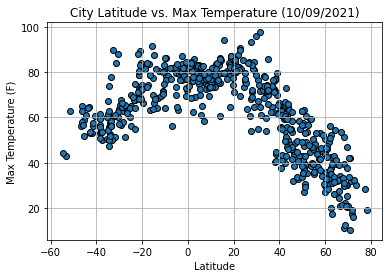

In [10]:
#Create x and y axis
x_axis = weather_data_df['Lat']
y_axis = weather_data_df['Max Temp']

#Create scatter plot
plt.scatter(x_axis, y_axis, edgecolors='k')

#Format the graph 
plt.title('City Latitude vs. Max Temperature (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#Save the plot
plt.savefig('./Images/CityLatitudeTemperature.png')

#Show plot
plt.show()

In the following plot, we can see the maximum temperature reaching its highest value around ~20 degrees latitude. Latitude values greater than 20 degreess seems to show a negative relationship with temperature whereas latitude values less than 20 degress seems to show a positive relationship with temperature.

## Latitude vs. Humidity Plot

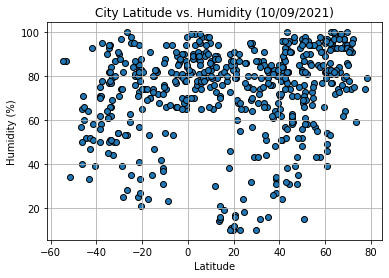

In [11]:
#Create x and y axis
x_axis = weather_data_df['Lat']
y_axis = weather_data_df['Humidity']

#Create scatter plot
plt.scatter(x_axis, y_axis, edgecolors='k')

#Format the graph 
plt.title('City Latitude vs. Humidity (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save the plot
plt.savefig('./Images/CityLatitudeHumidity.png')

#Show plot
plt.show()

In the following plot, there is no identifiable relationship between latitude and humidity. However, we can see that there is less variation in humidity for cities in the tropic (-20 to 20) compared to cities in the temperate regions (-20 to -60 and 20 to 60). 

## Latitude vs. Cloudiness Plot

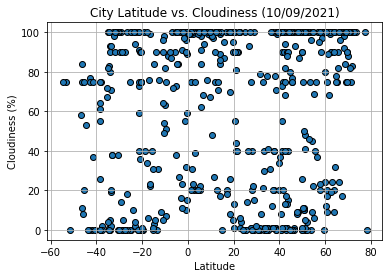

In [12]:
#Create x and y axis
x_axis = weather_data_df['Lat']
y_axis = weather_data_df['Cloudiness']

#Create scatter plot
plt.scatter(x_axis, y_axis, edgecolors='k')

#Format the graph 
plt.title('City Latitude vs. Cloudiness (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Save the plot
plt.savefig('./Images/CityLatitudeCloudiness.png')

#Show plot
plt.show()

In the following plot, cloudiness seems to be spread across the latitude displaying no real relationship.

## Latitude vs. Wind Speed Plot

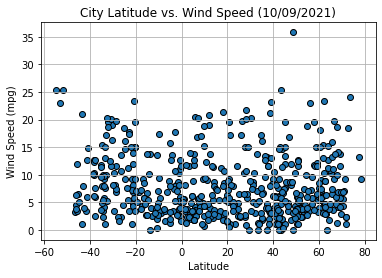

In [13]:
#Create x and y axis
x_axis = weather_data_df['Lat']
y_axis = weather_data_df['Wind Speed']

#Create scatter plot
plt.scatter(x_axis, y_axis, edgecolors='k')

#Format the graph 
plt.title('City Latitude vs. Wind Speed (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.grid(True)

#Save the plot
plt.savefig('./Images/CityLatitudeWindSpeed.png')

#Show plot
plt.show()

In the following plot, wind speeds are much more uniform for cities closer to the equator compared to cities that were further out north or south from the equator.

## Linear Regression

In [14]:
#Set variables for northern and southern hemisphere
north = weather_data_df.loc[weather_data_df['Lat'] >= 0]
south = weather_data_df.loc[weather_data_df['Lat'] < 0]

#Create a function that calculates linear regression 
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue}')
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq

#Create a function that annotates the 
def annotate(line_eq,a,b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8551498523957718


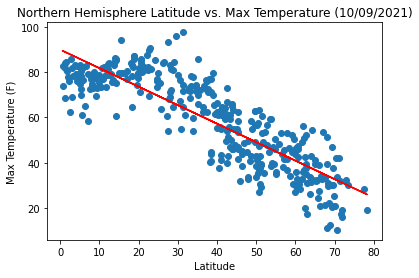

<Figure size 432x288 with 0 Axes>

In [15]:
regression_equation = linear_regression(north['Lat'], north['Max Temp'])
annotate(regression_equation, 0, 0)

#Format the graph 
plt.title('Northern Hemisphere Latitude vs. Max Temperature (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

#Save the plot
plt.savefig('./Images/NorthernCityLatitudeTemperature.png')

There is a strong negative relationship between Northern Hemisphere and Max Temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7116084692915838


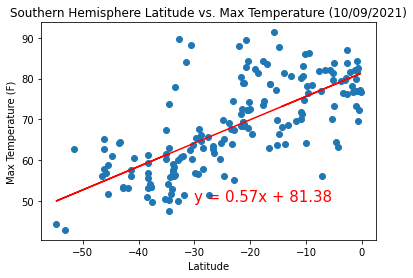

<Figure size 432x288 with 0 Axes>

In [16]:
regression_equation = linear_regression(south['Lat'], south['Max Temp'])
annotate(regression_equation, -30, 50)

#Format the graph 
plt.title('Southern Hemisphere Latitude vs. Max Temperature (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

#Save the plot
plt.savefig('./Images/SouthernCityLatitudeTemperature.png')

There is a strong positive relationship between Southern Hemisphere and Max Temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11143054350731703


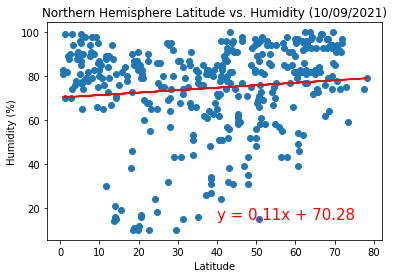

<Figure size 432x288 with 0 Axes>

In [17]:
regression_equation = linear_regression(north['Lat'], north['Humidity'])
annotate(regression_equation, 40, 15)

#Format the graph 
plt.title('Northern Hemisphere Latitude vs. Humidity (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#Save the plot
plt.savefig('./Images/NorthernCityLatitudeHumidity.png')

There is a weak positive relationship between Northern Hemisphere and Humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20861510715697


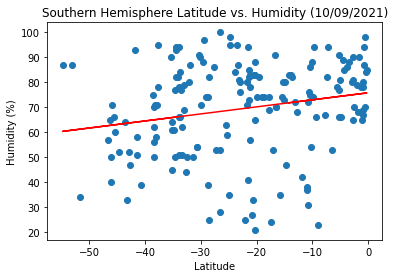

<Figure size 432x288 with 0 Axes>

In [18]:
regression_equation = linear_regression(south['Lat'], south['Humidity'])
annotate(regression_equation, -40, 15)

#Format the graph 
plt.title('Southern Hemisphere Latitude vs. Humidity (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#Save the plot
plt.savefig('./Images/SouthernCityLatitudeHumidity.png')

There is a weak positive relationship between Southern Hemisphere and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012603746865742815


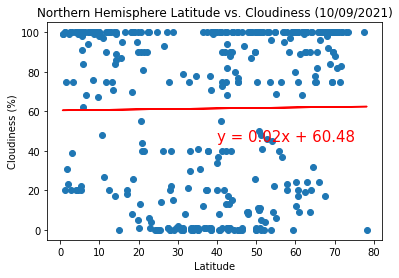

<Figure size 432x288 with 0 Axes>

In [19]:
regression_equation = linear_regression(north['Lat'], north['Cloudiness'])
annotate(regression_equation, 40, 45)

#Format the graph 
plt.title('Northern Hemisphere Latitude vs. Cloudiness (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#Save the plot
plt.savefig('./Images/NorthernCityLatitudeCloudiness.png')

There is very little to no relationship between Northern Hemisphere and Cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20864304127890268


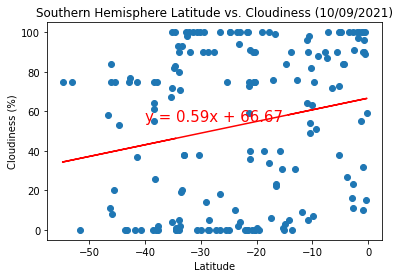

<Figure size 432x288 with 0 Axes>

In [20]:
regression_equation = linear_regression(south['Lat'], south['Cloudiness'])
annotate(regression_equation, -40, 55)

#Format the graph 
plt.title('Southern Hemisphere Latitude vs. Cloudiness (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#Save the plot
plt.savefig('./Images/SouthernCityLatitudeCloudiness.png')

There is a weak positive relationship between Southern Hemisphere and Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08518083870680526


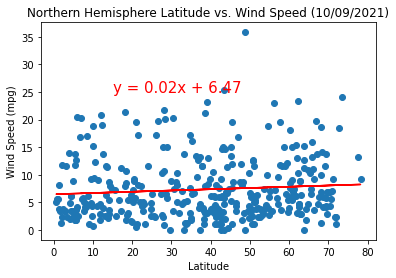

<Figure size 432x288 with 0 Axes>

In [21]:
regression_equation = linear_regression(north['Lat'], north['Wind Speed'])
annotate(regression_equation, 15, 25)

#Format the graph 
plt.title('Northern Hemisphere Latitude vs. Wind Speed (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.show()

plt.savefig('./Images/NorthernCityLatitudeWindSpeed.png')

There is no relationship between Northern Hemisphere and Wind Speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2495148952896873


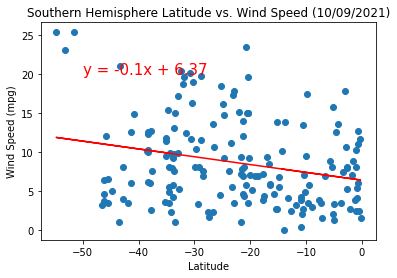

<Figure size 432x288 with 0 Axes>

In [22]:
regression_equation = linear_regression(south['Lat'], south['Wind Speed'])
annotate(regression_equation, -50, 20)

#Format the graph 
plt.title('Southern Hemisphere Latitude vs. Wind Speed (10/09/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.show()

plt.savefig('./Images/SouthernCityLatitudeWindSpeed.png')

There is a weak negative relationship between Southern Hemisphere and Wind Speed.